In [1]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
# libraries

import sys
print("Python version: {}".format(sys.version))
import time

import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
print("Matplotlib version: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn version: {}".format(sns.__version__))
import scipy
print("Scipy version: {}".format(scipy.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

# Modelling libraries
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

print('-'*25)
# check inside input directory for the files
!ls -lrth input

Python version: 3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]
Pandas version: 0.23.4
Numpy version: 1.14.5
Matplotlib version: 2.2.3
Seaborn version: 0.9.0
Scipy version: 1.1.0
scikit-learn version: 0.19.2
-------------------------
total 92K
-rw-rw-r-- 1 triloq triloq 3.2K Aug 16 14:35 gender_submission.csv
-rw-rw-r-- 1 triloq triloq  28K Aug 16 14:35 test.csv
-rw-rw-r-- 1 triloq triloq  60K Aug 16 14:35 train.csv


In [4]:
# loading data

train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

print("Train dataframe shape is: ", train_df.shape)
print("Test dataframe shape is: ", test_df.shape)

Train dataframe shape is:  (891, 12)
Test dataframe shape is:  (418, 11)


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print(train_df.info())
print('-'*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print("total 'train_df' columns with null values:\n", train_df.isnull().sum())
print('-'*30)
print("total 'test_df' columns with null values:\n", test_df.isnull().sum())

total 'train_df' columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
total 'test_df' columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
full_df = train_df.append(test_df, ignore_index=True)
print('full_df shape:', full_df.shape)
print('train_df shape:', train_df.shape)
print('test_df shape:', test_df.shape)

full_df shape: (1309, 12)
train_df shape: (891, 12)
test_df shape: (418, 11)


In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [16]:
full_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### categorical values

In [17]:
embarked_df = pd.get_dummies(full_df.Embarked, prefix='Embarked')
embarked_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
full_df['Sex'] = full_df['Sex'].map({'female': 0, 'male': 1})
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [19]:
pclass_df = pd.get_dummies(full_df.Pclass, prefix='Pclass')
pclass_df.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


### missing values

In [20]:
# missing values in Age, Cabin, Embarked, Fare
imputer_df = pd.DataFrame()

imputer_df['Age'] = full_df.Age.fillna(value= full_df.Age.mean())
imputer_df['Fare'] = full_df.Fare.fillna(value= full_df.Fare.mean())

imputer_df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### feature engineering

In [21]:
#list(full_df.Cabin.value_counts().index)

In [22]:
cabin_df = pd.DataFrame()

# missing values as U (unknown)
cabin_df['cabin'] = full_df.Cabin.fillna('U')

# mapping each Cabin value with the cabin letter
cabin_df[ 'cabin' ] = cabin_df[ 'cabin' ].map( lambda c : c[0] )

# dummy encoding
cabin_df = pd.get_dummies(cabin_df['cabin'], prefix='cabin')

cabin_df.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [23]:
# extracting class info from tickets, for ticket numbers where there's no class mentioned putting xxx
def cleanTicket(ticket):
    ticket = ticket.replace( '.', '')
    ticket = ticket.replace( '/', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

ticket_df = pd.DataFrame()

ticket_df['Ticket'] = full_df.Ticket.map(cleanTicket)

# dummy encoding from ticket-classes
ticket_df = pd.get_dummies(ticket_df['Ticket'], prefix='Ticket')
print(ticket_df.shape)
ticket_df.head()


(1309, 37)


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# extracting family size from the Parch and SibSp variabels
family_df = pd.DataFrame()

# extracting family size, including the passenger
family_df['FamilySize'] = full_df['Parch'] + full_df['SibSp'] + 1

# extracting family type based on the size, as: single, small family or big family
family_df['SingleFamily'] = family_df['FamilySize'].map(lambda f: 1 if f == 1 else 0)
family_df['SmallFamily'] = family_df['FamilySize'].map(lambda f: 1 if 2 <= f <= 4 else 0)
family_df['BigFamily'] = family_df['FamilySize'].map(lambda f: 1 if f >= 5 else 0)

print(family_df.shape)
family_df.head()

(1309, 4)


,FamilySize,SingleFamily,SmallFamily,BigFamily
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [25]:
# new feature - extracting Title from Names
title_df = pd.DataFrame()

title_df['Title'] = full_df.Name.str.extract( ' ([A-Za-z]+)\.', expand=False)
# matches the first word which ends with a dot character 
# expand=False returns a dataframe

pd.crosstab(title_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
title_df['Title'] = title_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                               'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
title_df['Title'] = title_df['Title'].replace('Mlle', 'Miss')
title_df['Title'] = title_df['Title'].replace('Ms', 'Miss')
title_df['Title'] = title_df['Title'].replace('Mme', 'Mrs')

pd.crosstab(title_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [27]:
# dummy encoding
title_df = pd.get_dummies(title_df['Title'], prefix='Title')

print(title_df.shape)
title_df.head()

(1309, 5)


,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [28]:
full_df.shape

(1309, 12)

In [29]:
# merging all dfs
# imputed , embarked , pclass , sex , family , cabin , ticket , title
full = pd.concat([imputer_df, embarked_df, pclass_df, full_df['Sex'], family_df, cabin_df, ticket_df, title_df], axis=1)

print(full.shape)
full.head()

(1309, 64)


,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,7.2500,0,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,1,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0


### creating datasets

In [30]:
X = full[0:891]
y = train_df['Survived']
X_test = full[891:]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=29)

print("\nfull: ", full.shape,"\nX_train: ", X_train.shape, "\ny_train: ", y_train.shape,
      "\nX_valid: ", X_valid.shape, "\ny_valid: ", y_valid.shape, "\nX_test: ", X_test.shape)


full:  (1309, 64) 
X_train:  (623, 64) 
y_train:  (623,) 
X_valid:  (268, 64) 
y_valid:  (268,) 
X_test:  (418, 64)


In [31]:
print(X.shape)
print(y.shape)
print(train_df['Survived'].shape)

(891, 64)
(891,)
(891,)


### feature importance

In [32]:
# selecting the optimal features is important in model building
tree = DecisionTreeClassifier(random_state=29)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')

In [33]:
imp = pd.DataFrame(tree.feature_importances_ , 
                   columns=['Importance'], 
                   index=X.columns)

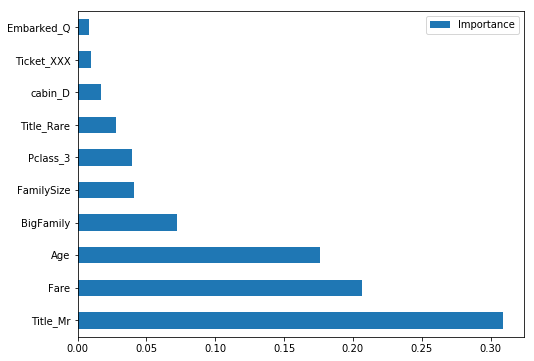

In [34]:
imp = imp.sort_values(['Importance'], ascending=False)
imp[ : 10 ].plot(kind = 'barh', figsize=(8, 6))

### model selection and training

In [35]:
# Logistic Regression

logr = LogisticRegression()
logr.fit(X_train, y_train)
#y_pred = logr.predict(X_test)
logr_acc = logr.score(X_train, y_train) * 100
logr_acc

83.94863563402889

In [36]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
#y_pred = svc.predict(X_test)
svc_acc = svc.score(X_train, y_train) * 100
svc_acc

81.05939004815409

In [37]:
# k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_train, y_train) * 100
knn_acc

83.94863563402889

In [38]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_acc = gnb.score(X_train, y_train) * 100
gnb_acc

46.22792937399679

In [39]:
# Perceptron

perc = Perceptron()
perc.fit(X_train, y_train)
perc_acc = perc.score(X_train, y_train) * 100
perc_acc

76.24398073836277

In [40]:
# Linear SVC

lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)
lin_svc_acc = lin_svc.score(X_train, y_train) * 100
lin_svc_acc

76.24398073836277

In [41]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_acc = sgd.score(X_train, y_train) * 100
sgd_acc

72.71268057784911

In [42]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = dt.score(X_train, y_train) * 100
dt_acc

99.51845906902086

In [43]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_train, y_train) * 100
rf_acc

99.51845906902086

In [44]:
# XGBoost 

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_acc = xgb.score(X_train, y_train) * 100
xgb_acc

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


90.36918138041734

In [45]:
# lets try all ML Algo and compare against each other

MLA = [
    #Ensemble
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    LogisticRegression(),
    SGDClassifier(),
    Perceptron(),
    
    #Naive Bayes
    GaussianNB(),
    BernoulliNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(),
    LinearSVC(),
    
    #Trees
    DecisionTreeClassifier(),
    
    #xgboost
    XGBClassifier()
]

MLA_columns = ['MLA Name', 'Hyperparameters', 'Train Mean Accuracy', 'Test Mean Accuracy',
              'Test Accuracy 3*STD', 'Time Taken']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = y.copy()

In [47]:
#split dataset in cross-validation with this splitter class: 
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

# run model 10x with 60/30 split intentionally leaving out 10%
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 29 )

row_index = 0
for alg in MLA:
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Hyperparameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = cross_validate(alg, X_train, y_train, cv  = cv_split)
    
    MLA_compare.loc[row_index, 'Time Taken'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Train Mean Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Mean Accuracy'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets. let's see the worst that can happen!
    MLA_compare.loc[row_index, 'Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   
    
    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Mean Accuracy'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

,MLA Name,Hyperparameters,Train Mean Accuracy,Test Mean Accuracy,Test Accuracy 3*STD,Time Taken
3,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.850402,0.828342,0.0686099,0.0052047
1,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.941287,0.827273,0.0625668,0.122453
12,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.910456,0.825134,0.0782815,0.0691967
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.880429,0.804813,0.0899684,0.108226
2,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.980429,0.804278,0.0634451,0.0208173
7,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.803753,0.796791,0.0924376,0.00298023
10,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.820643,0.769519,0.137529,0.0331965
11,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.996247,0.764706,0.0657558,0.00449054
9,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.815818,0.70107,0.0733245,0.0157276
8,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.796783,0.681818,0.0609837,0.00237148


Text(0,0.5,'Algorithm')

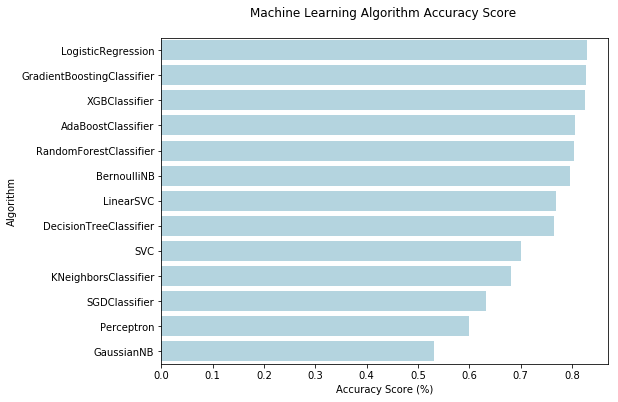

In [49]:
sns.barplot(x='Test Mean Accuracy', y = 'MLA Name', data = MLA_compare, color = 'lightblue')

rcParams['figure.figsize'] = (8,6)
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [50]:
imp[:10] #top 10 imp features

,Importance
Title_Mr,0.308846
Fare,0.206445
Age,0.175831
BigFamily,0.072249
FamilySize,0.041125
Pclass_3,0.039855
Title_Rare,0.028045
cabin_D,0.016836
Ticket_XXX,0.009662
Embarked_Q,0.008228


In [51]:
full.loc[:,['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q']].head()

,Title_Mr,Fare,Age,BigFamily,FamilySize,Pclass_3,Title_Rare,cabin_D,Ticket_XXX,Embarked_Q
0,1,7.2500,22.0,0,2,1,0,0,0,0
1,0,71.2833,38.0,0,2,0,0,0,0,0
2,0,7.9250,26.0,0,1,1,0,0,0,0
3,0,53.1000,35.0,0,2,0,0,0,1,0
4,1,8.0500,35.0,0,1,1,0,0,1,0


In [52]:
# create new dataset
new_full = full[['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q']]
new_full.head()

,Title_Mr,Fare,Age,BigFamily,FamilySize,Pclass_3,Title_Rare,cabin_D,Ticket_XXX,Embarked_Q
0,1,7.2500,22.0,0,2,1,0,0,0,0
1,0,71.2833,38.0,0,2,0,0,0,0,0
2,0,7.9250,26.0,0,1,1,0,0,0,0
3,0,53.1000,35.0,0,2,0,0,0,1,0
4,1,8.0500,35.0,0,1,1,0,0,1,0


In [53]:
X.shape

(891, 64)

In [54]:
y.shape

(891,)

In [55]:
X1 = new_full[0:891]
X_test = new_full[891:]

X_train, X_valid, y_train, y_valid = train_test_split(X1, y, test_size=0.3, random_state=29)

print("\nfull: ", full.shape,"\nX_train: ", X_train.shape, "\ny_train: ", y_train.shape,
      "\nX_valid: ", X_valid.shape, "\ny_valid: ", y_valid.shape, "\nX_test: ", X_test.shape)


full:  (1309, 64) 
X_train:  (623, 10) 
y_train:  (623,) 
X_valid:  (268, 10) 
y_valid:  (268,) 
X_test:  (418, 10)


In [56]:
# Logistic Regression - after feature selection

logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_acc = logr.score(X_train, y_train) * 100
logr_acc
#y_pred_logr = logr.predict(X_test)

82.8250401284109

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_acc = gbc.score(X_train, y_train) * 100
gbc_acc

91.49277688603532

In [58]:
#y_pred
y_pred = gbc.predict(X_test)

In [59]:
params_grid = [
    {'learning_rate':[0.1,0.05]},
    {'n_estimators': [100, 200, 300]},
    {'max_depth': [2, 4, 6, 8, 10, 12]}
]

grid_search = GridSearchCV(gbc, params_grid, cv= cv_split, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=29, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.1, 0.05]}, {'n_estimators': [100, 200, 300]}, {'max_depth': [2, 4, 6, 8, 10, 12]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
grid_search.best_params_

{'learning_rate': 0.1}

In [61]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [62]:
cv_res = grid_search.cv_results_

#cv_res
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

0.42135508416521056 {'learning_rate': 0.1}
0.4289023423243768 {'learning_rate': 0.05}
0.4219891779538433 {'n_estimators': 100}
0.4289023423243768 {'n_estimators': 200}
0.4417999159975034 {'n_estimators': 300}
0.4245160818429798 {'max_depth': 2}
0.4375429696239898 {'max_depth': 4}
0.4607596610388563 {'max_depth': 6}
0.4750457337960851 {'max_depth': 8}
0.471089305429278 {'max_depth': 10}
0.482861346779698 {'max_depth': 12}


In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14567808, 0.32218911, 0.30855909, 0.01155658, 0.06297539,
       0.03944919, 0.05539424, 0.01891424, 0.02137729, 0.01390679])

In [64]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
final_model_acc = final_model.score(X_train, y_train) * 100
final_model_acc

91.49277688603532

In [65]:
final_predictions = final_model.predict(X_test)

In [66]:
PassengerId = full_df[891:].PassengerId
#Survived = y_pred
submit_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': final_predictions}, index=None)
print(submit_df.shape)
submit_df.head()

(418, 2)


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [63]:
submit_df.to_csv('titanic_submission_gbc2.csv', index=False)

In [67]:
# trying ensemble
MLA_compare.head(5)

,MLA Name,Hyperparameters,Train Mean Accuracy,Test Mean Accuracy,Test Accuracy 3*STD,Time Taken
3,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.850402,0.828342,0.0686099,0.0052047
1,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.941287,0.827273,0.0625668,0.122453
12,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.910456,0.825134,0.0782815,0.0691967
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.880429,0.804813,0.0899684,0.108226
2,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.980429,0.804278,0.0634451,0.0208173


In [68]:
vote_est = [
    ('lr', LogisticRegression()),
    ('gb', GradientBoostingClassifier()),
    ('xg', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('ada', AdaBoostClassifier())
]

#Hard Vote or majority rules
vote_hard = VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, X_train, y_train, cv  = cv_split)
vote_hard.fit(X_train, y_train)

print("Hard Voting Training score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, X_train, y_train, cv  = cv_split)
vote_soft.fit(X_train, y_train)

print("Soft Voting Training score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Hard Voting Training score mean: 91.31
Hard Voting Test score mean: 82.67
Hard Voting Test score 3*std: +/- 8.16
----------


/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Soft Voting Training score mean: 92.84
Soft Voting Test score mean: 82.25
Soft Voting Test score 3*std: +/- 7.85
----------


In [69]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [29]


grid_param = [
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],
    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }],
    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }]
]


start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X_train, y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for LogisticRegression is {'fit_intercept': True, 'random_state': 29, 'solver': 'liblinear'} with a runtime of 1.91 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 29} with a runtime of 56.32 seconds.
The best parameter for XGBClassifier is {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 300, 'seed': 29} with a runtime of 62.39 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 29} with a runtime of 143.26 seconds.
The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 29} with a runtime of 59.53 seconds.
Total optimization time was 5.39 minutes.
----------


In [70]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = cross_validate(grid_hard, X_train, y_train, cv  = cv_split)
grid_hard.fit(X_train, y_train)

print("Hard Voting w/Tuned Hyperparameters Training score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = cross_validate(grid_soft, X_train, y_train, cv  = cv_split)
grid_soft.fit(X_train, y_train)

print("Soft Voting w/Tuned Hyperparameters Training score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Hard Voting w/Tuned Hyperparameters Training score mean: 84.34
Hard Voting w/Tuned Hyperparameters Test score mean: 81.76
Hard Voting w/Tuned Hyperparameters Test score 3*std: +/- 8.10
----------


/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Soft Voting w/Tuned Hyperparameters Training score mean: 86.22
Soft Voting w/Tuned Hyperparameters Test score mean: 82.14
Soft Voting w/Tuned Hyperparameters Test score 3*std: +/- 7.43
----------


In [71]:
ensemble_hardvote_predict = grid_hard.predict(X_test)

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
#ensemble_hardvote_predict

In [73]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': ensemble_hardvote_predict}, index=None)
print(submit_df.shape)
submission.to_csv('titanic_submission_ensemble.csv', index=False)

(418, 2)


the above led to a public score of 0.78947 on the Kaggle leaderboard; (Rank # 3170/9464); among top 33%
### Hence, RESTARTING everything again

In [187]:
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

print("Train dataframe shape is: ", train_df.shape)
print("Test dataframe shape is: ", test_df.shape)

full_df = train_df.append(test_df, ignore_index=True)
print('full_df shape:', full_df.shape)

Train dataframe shape is:  (891, 12)
Test dataframe shape is:  (418, 11)
full_df shape: (1309, 12)


In [188]:
# feature engineering
full_df['Sex'] = full_df['Sex'].map({'female': 0, 'male': 1})
full_df['Age'] = full_df.Age.fillna(value = full_df.Age.mean())
full_df['Fare'] = full_df.Fare.fillna(value = full_df.Fare.mean())
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [189]:
train = full_df[:891]
test = full_df[891:].drop(['Survived'], axis = 1)
print("Train dataframe shape is: ", train_df.shape)
print("Test dataframe shape is: ", test_df.shape)

Train dataframe shape is:  (891, 12)
Test dataframe shape is:  (418, 11)


In [190]:
# mark passengers as Minor if their name has 'Master.' in it Or if their age is < 16
full_df['Minor'] = full_df.apply(lambda x: 1 if (x['Name'].split(',')[-1].split()[0] == 'Master.') | (x['Age'] < 16) \
                             else 0, axis = 1)
# family size
full_df['FamilySize'] = full_df['Parch'] + full_df['SibSp'] + 1

In [191]:
# women-child-travelling-together-grouping
""" surnames alone don't specify that people with same surname where in a fmaily and travelling together,
for example, see passengerId: 195 and 1067
"""
full_df.loc[(full_df.PassengerId==195) | (full_df.PassengerId==1067)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Minor,FamilySize
194,44.0,B4,C,27.7208,"Brown, Mrs. James Joseph (Margaret Tobin)",0,195,1,0,0,1.0,PC 17610,0,1
1066,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,1067,2,0,0,NaN,29750,1,3


They both have surname 'Brown' and appear to be a mother traveling with her daughter. However, they have different Pclasses, different Tickets, different Fares, different Cabins, different Embarked, and incompatible SibSp and Parch. Therefore, these two passengers are not related. Hence grouping of women-child can not be done just based on their surnames, rather we could do a concatenation of Surname + Pclass + Ticket + Fare + Embarked

In [192]:
# extracting surname
full_df['Surname'] = full_df.apply(lambda x: x['Name'].split(',')[0], axis = 1)
# extracting ticket class, and purposely ommiting the last digit in the ticket numbers and replacing it with 'X'
# as family members would be sitting right next to each other varying by a digit in the ticket no.
full_df['TicketClass'] = full_df.apply(lambda x: x['Ticket'][:-1]+'X', axis = 1)

# women-child-grouping
full_df['WCG_Id'] = full_df.apply(lambda x: x['Surname'] + '-' + str(x['Pclass']) + '-' + str(x['TicketClass']) + '-' + str(x['Fare']) + '-' + str(x['Embarked']), axis = 1)

full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Minor,FamilySize,Surname,TicketClass,WCG_Id
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,2,Braund,A/5 2117X,Braund-3-A/5 2117X-7.25-S
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,2,Cumings,PC 1759X,Cumings-1-PC 1759X-71.2833-C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,1,Heikkinen,STON/O2. 310128X,Heikkinen-3-STON/O2. 310128X-7.925-S
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,2,Futrelle,11380X,Futrelle-1-11380X-53.1-S
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,1,Allen,37345X,Allen-3-37345X-8.05-S


In [193]:
full_df.loc[(full_df.PassengerId==59) | (full_df.PassengerId==473) | (full_df.PassengerId==1142), ['Name','WCG_Id']]

,Name,WCG_Id
58,"West, Miss. Constance Mirium",West-2-C.A. 3465X-27.75-S
472,"West, Mrs. Edwy Arthur (Ada Mary Worth)",West-2-C.A. 3465X-27.75-S
1141,"West, Miss. Barbara J",West-2-C.A. 3465X-27.75-S


now this looks like a women-child-group travelling together.....with same surname, same Pclass, same ticketClass, same fare and same source of journey(embarked)

In [194]:
# normalize all features by diving them with their max value, so the values stay b/w 0 and 1
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Minor,FamilySize,Surname,TicketClass,WCG_Id
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,2,Braund,A/5 2117X,Braund-3-A/5 2117X-7.25-S
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,2,Cumings,PC 1759X,Cumings-1-PC 1759X-71.2833-C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,1,Heikkinen,STON/O2. 310128X,Heikkinen-3-STON/O2. 310128X-7.925-S
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,2,Futrelle,11380X,Futrelle-1-11380X-53.1-S
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,1,Allen,37345X,Allen-3-37345X-8.05-S


In [214]:
# full_df.Age.max() # 80
full_df['Age'] = full_df['Age'] / 80
# full_df['FamilySize'].max() # 11
full_df['FamilySize'] = full_df['FamilySize'] / 11
# full_df.Fare.max() # 512.3292
full_df['FareAdj'] = full_df['Fare']/512.3292

In [218]:
full_df[['Sex','Age','Minor','FareAdj','FamilySize','WCG_Id']].head()

,Sex,Age,Minor,FareAdj,FamilySize,WCG_Id
0,1,0.2750,0,0.014151,0.181818,Braund-3-A/5 2117X-7.25-S
1,0,0.4750,0,0.139136,0.181818,Cumings-1-PC 1759X-71.2833-C
2,0,0.3250,0,0.015469,0.090909,Heikkinen-3-STON/O2. 310128X-7.925-S
3,0,0.4375,0,0.103644,0.181818,Futrelle-1-11380X-53.1-S
4,1,0.4375,0,0.015713,0.090909,Allen-3-37345X-8.05-S


In [235]:
le = LabelEncoder()
full_df['WCGEmbed'] = le.fit_transform(full_df['WCG_Id'])
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Minor,FamilySize,Surname,TicketClass,WCG_Id,FareAdj,WCGEmbed
0,0.2750,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,0.181818,Braund,A/5 2117X,Braund-3-A/5 2117X-7.25-S,0.014151,116
1,0.4750,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,0.181818,Cumings,PC 1759X,Cumings-1-PC 1759X-71.2833-C,0.139136,216
2,0.3250,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,0.090909,Heikkinen,STON/O2. 310128X,Heikkinen-3-STON/O2. 310128X-7.925-S,0.015469,392
3,0.4375,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,0.181818,Futrelle,11380X,Futrelle-1-11380X-53.1-S,0.103644,319
4,0.4375,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0.090909,Allen,37345X,Allen-3-37345X-8.05-S,0.015713,16


In [236]:
X_train = full_df[['Sex','Age','Minor','FareAdj','FamilySize','WCGEmbed']][:891]
y_train = full_df[['Survived']][:891]
X_test = full_df[['Sex','Age','Minor','FareAdj','FamilySize','WCGEmbed']][891:]

In [239]:
#Hard Vote or majority rules
vote_hard = VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, X_train, y_train, cv  = cv_split)
vote_hard.fit(X_train, y_train)

print("Hard Voting Training score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, X_train, y_train, cv  = cv_split)
vote_soft.fit(X_train, y_train)

print("Soft Voting Training score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Hard Voting Training score mean: 83.43
Hard Voting Test score mean: 79.78
Hard Voting Test score 3*std: +/- 7.27
----------


/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle

Soft Voting Training score mean: 84.55
Soft Voting Test score mean: 80.86
Soft Voting Test score 3*std: +/- 6.45
----------


In [240]:
ensemble_hardvote_predict = vote_hard.predict(X_test)
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': ensemble_hardvote_predict}, index=None)
print(submit_df.shape)
submission.to_csv('submission_WCG_ensemble.csv', index=False)

(418, 2)


/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [241]:
submission.head()

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0


In [242]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_acc = xgb.score(X_train, y_train) * 100
y_pred = xgb.predict(X_test)
xgb_acc

/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/triloq/Documents/personal-repo/venvs/kaggle-venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


87.65432098765432

In [243]:

submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred}, index=None)
print(submit_df.shape)
submission.to_csv('submission_WCG_XGB.csv', index=False)

(418, 2)


In [244]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
logr_acc = logr.score(X_train, y_train) * 100
logr_acc

79.68574635241302

In [245]:

submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred}, index=None)
print(submit_df.shape)
submission.to_csv('submission_WCG_LR.csv', index=False)

(418, 2)
